# GPU Convolution

This notebooks shows how to pefrom the same convolution from the previous notebooks using CUDA Toolkit.

#### from previous notebooks

In [1]:
from PIL import Image
import ctypes
from ctypes import *
import numpy as np
import time

# http://localhost:8888/notebooks/1_Image_Metadata.ipynb
from AI_Decomposed import image_meta 
from AI_Decomposed import display_channel

# http://localhost:8888/notebooks/2_Py_Convolution.ipynb
from AI_Decomposed import PY_recurse_pooling

# http://localhost:8888/notebooks/3_CPP_Convolution.ipynb
from AI_Decomposed import native_recurse_pooling
CPP_recurse_convolution = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

### load image

In [2]:
image_file = './imgs/nyc.jpg'
[height, width, red,green,blue] = image_meta(image_file)
channel_size = height * width

print('image height  : ', height)
print('image width   : ', width)
print('chanel size   : ', channel_size)
print('total pixels  : ', channel_size * 3) # 3 channels

image height  :  671
image width   :  1000
chanel size   :  671000
total pixels  :  2013000


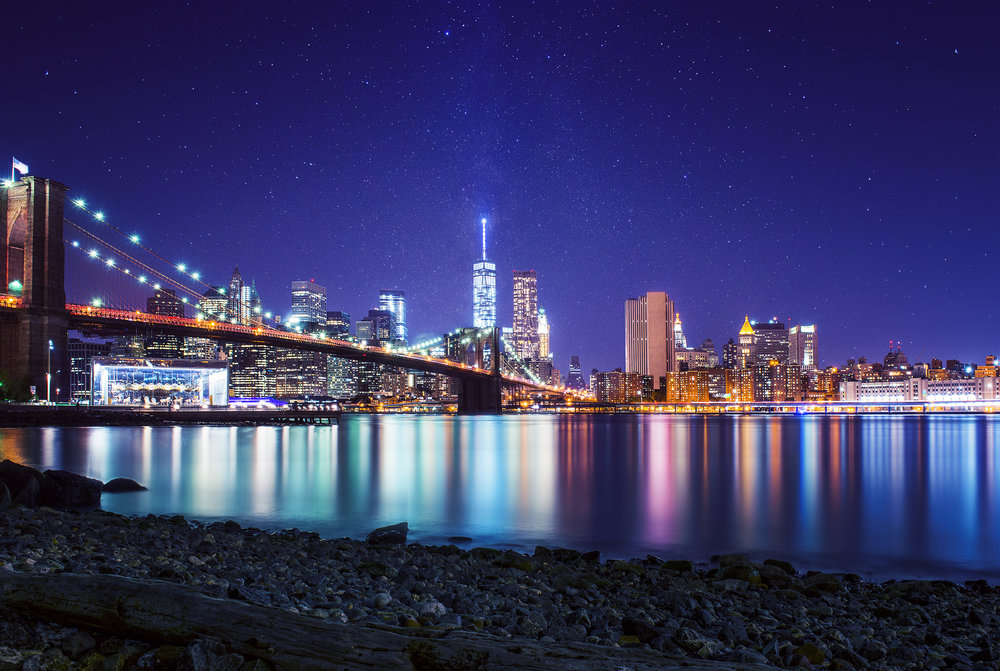

In [3]:
Image.open(image_file)

### function to call GPU pooling function

In [25]:
GPU_pooling = cdll.LoadLibrary('/home/will/cuda-workspace/simple_pooling/src/lib_gpu.so').pooling

### baseline test

In [5]:
mat = list(range(0,16,1))
display(mat)
native_recurse_pooling(mat, 4, 1, False, GPU_pooling)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

[2, 4, 4, 6, 8, 8, 10, 12, 12]

### image test

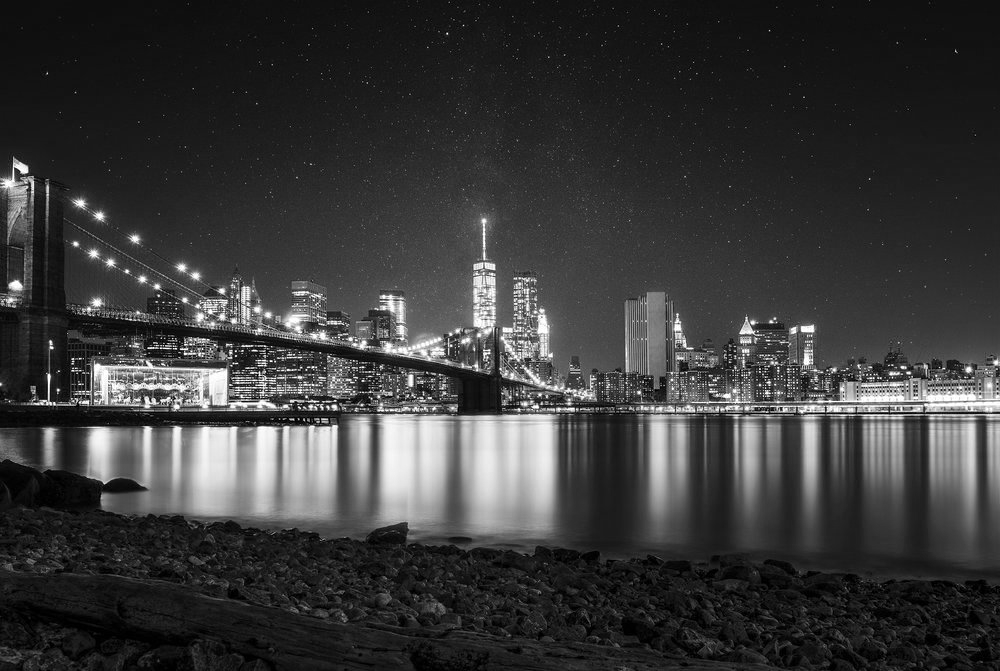

In [6]:
display_channel(green,width)

671000
669330


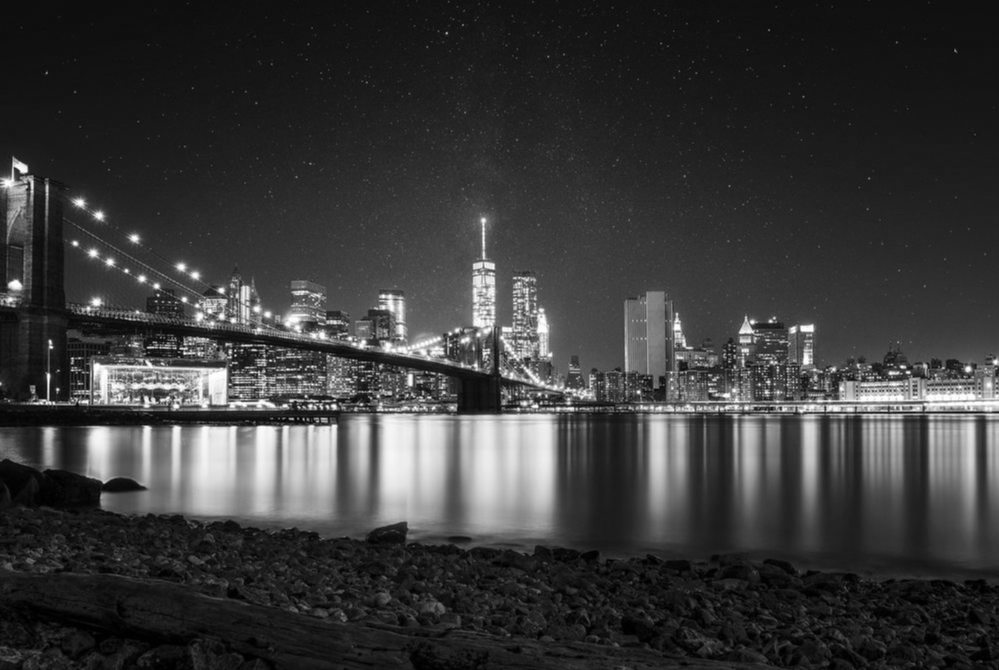

In [7]:
mat = green
w = width
recurse_cnt = 1
use_max = False
GPU_convolution = native_recurse_pooling(mat, w, recurse_cnt, use_max, GPU_pooling)
print(len(mat))
print(len(GPU_convolution))
display_channel(GPU_convolution,width-recurse_cnt)

In [11]:
gpu_function_ptt = cdll.LoadLibrary('/home/will/cuda-workspace/simple_pooling/src/gpu.so').pooling
cpp_function_ptr = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

print('mat_size : ', len(green),'\n')
print('recurse_cnt,\tgpu_time,\tcpp_time')

for recurse_cnt in [1,5,10,50,100]:    
    
    print(recurse_cnt, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    gpu_conv = native_recurse_pooling(green, width, recurse_cnt, False, gpu_function_ptt)    
    secs = round(time.time() - start,2)
    print(secs, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    cpp_conv = native_recurse_pooling(green, width, recurse_cnt, False, cpp_function_ptr)    
    secs = round(time.time() - start,2)
    print(secs, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    #start = time.time()
    #py_conv = PY_recurse_pooling(green, width, np.mean, recurse_cnt)    
    #secs = round(time.time() - start,2)
    #print(secs, end='', flush=True)
        
    print()        
        
print('\n\nfinis')            

mat_size :  671000 

recurse_cnt,	gpu_time,	cpp_time
1,		0.14,		0.29,		
5,		0.14,		0.92,		
10,		0.14,		1.86,		
50,		0.14,		8.02,		
100,		0.17,		16.47,		


finis


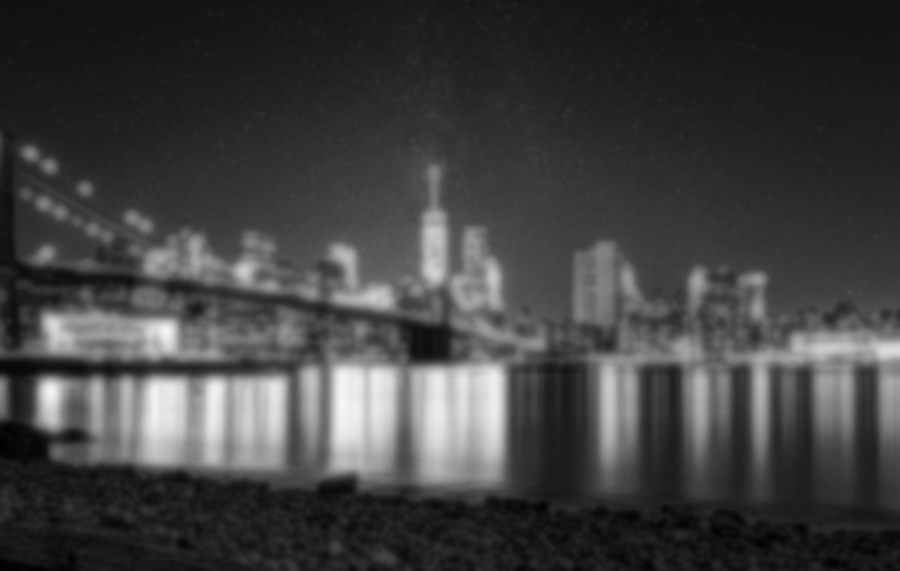

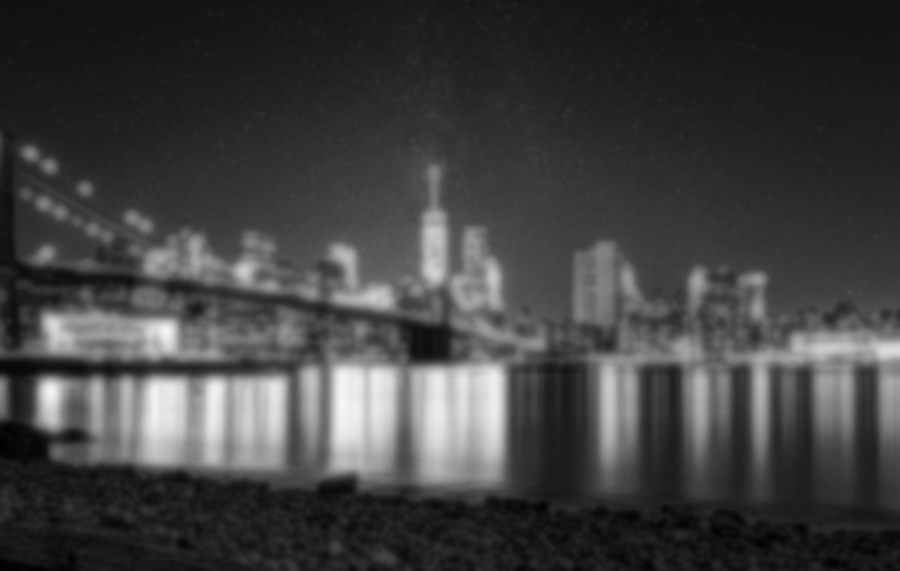

In [12]:
display_channel(gpu_conv, width - (recurse_cnt))
display_channel(cpp_conv, width - (recurse_cnt))     

mat_size :  671000 

recurse_cnt,	gpu_time
100,		0.15,		
width start: 1000  end: 900


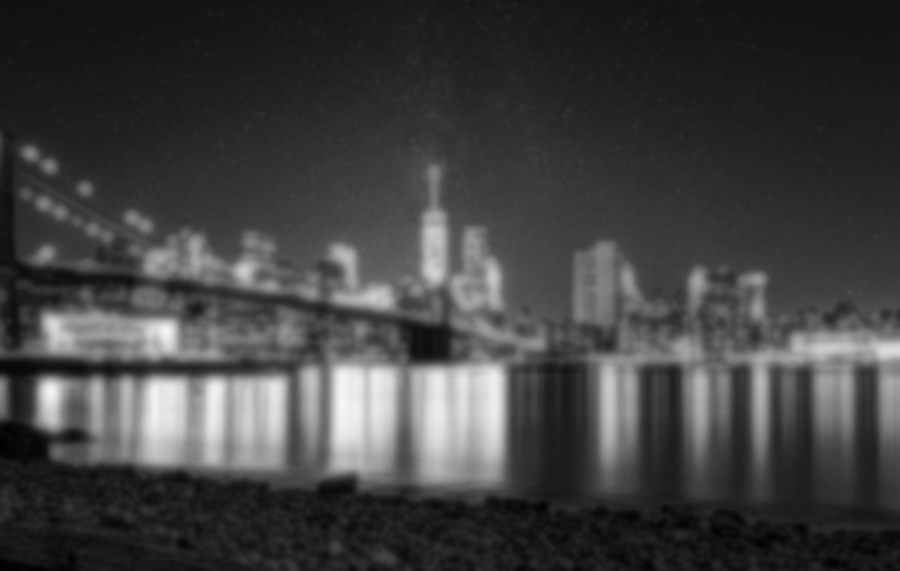

600,		0.14,		
width start: 1000  end: 400


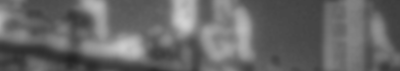



finis


In [26]:
print('mat_size : ', len(green),'\n')
print('recurse_cnt,\tgpu_time')
for recurse_cnt in [100,600]:    
    
    print(recurse_cnt, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    start = time.time()
    gpu_conv = native_recurse_pooling(green, width, recurse_cnt, False, gpu_function_ptt)    
    secs = round(time.time() - start,2)
    print(secs, end='', flush=True)
    print(',\t\t',   end='', flush=True)
    
    print()        
    print('width start:',width,' end:',width - (recurse_cnt))
    display_channel(gpu_conv, width - (recurse_cnt))
        
print('\n\nfinis')      
